In [1]:
import pandas as pd

In [2]:
def cleaner(dirty_list):
    """
    takes in a list of strings and cleans those by removing special characters
    and trimming excess whitespace
    to get rid of potential duplicates
    """
    spec_chars = ["!",'"',"#","%","&","'","(",")", "*","+",",",
                  "-",".","/",":",";","<", "=",">","?","@","[",
                  "\\","]","^","_", "`","{","|","}","~","–", 
                  "\xc2", "\xa0", "\x80", "\x9c", "\x99", "\x94", 
                  "\xad", "\xe2", "\x9d", "\n"]
    for i in range(len(dirty_list)):
        for char in spec_chars:
            dirty_list[i] = dirty_list[i].replace(char, ' ')
            dirty_list[i] = dirty_list[i].strip()
            dirty_list[i] = dirty_list[i].split()
            dirty_list[i] = ' '.join(dirty_list[i])
    return dirty_list

In [3]:
data = pd.read_csv('Copy_of_wgbh.csv', index_col='DateEntered', parse_dates=True)

# convert index to yearly DateTime object
data.index = data.index.to_period('Y')

# drop everything but race, contractor columns
data_POC = data.drop(['Agency', 'ProjectName', 'ProjectAddress_1',
       'SubContractor', 'Developer', 'SubContractorAddress_1',
       'SubContractorAddress_2', 'Trade', 'MINOR'], axis=1)

data_women = data.drop(['Agency', 'ProjectName', 'ProjectAddress_1',
       'SubContractor', 'Developer', 'SubContractorAddress_1',
       'SubContractorAddress_2', 'Trade', 'MINOR'], axis=1)

data_res = data.drop(['Agency', 'ProjectName', 'ProjectAddress_1',
       'SubContractor', 'Developer', 'SubContractorAddress_1',
       'SubContractorAddress_2', 'Trade', 'MINOR'], axis=1)

In [6]:
POC = data.groupby(data['Race_Desc'])
women = data.groupby(data['SEX'])
res = data.groupby(data['RESIDENT'])

In [10]:
from collections import defaultdict

In [11]:
races = defaultdict()
sexes = defaultdict()
res = defaultdict()

In [14]:
data['TotalHours'].sum()

43611873.65100001

In [19]:
# percentage of hours assigned to minorities
1 - (data[data['Race_Desc'] == 'CAUCASIAN']['TotalHours'].sum()) / data['TotalHours'].sum()

0.3578956010673968

In [20]:
# percentage of hours assigned to Boston Residents
(data[data['RESIDENT'] == 'Y']['TotalHours'].sum() + data[data['RESIDENT'] == 'y']['TotalHours'].sum()) / data['TotalHours'].sum()

0.25904472010092033

In [21]:
# percentage of hours assigned to women
(data[data['SEX'] == 'F']['TotalHours'].sum()) / data['TotalHours'].sum()

0.057265416133817804

In [22]:
contractor_groups = data.groupby(data['GeneralContractor'])
contractors_list = data.GeneralContractor.unique()

contractor_stats = pd.DataFrame(index=contractors_list, columns=['Hours_to_POC', 'Hours_to_Residents', 'Hours_to_women'])

for i in range(len(contractors_list)):
    group = contractor_groups.get_group(contractors_list[i])
    pct_POC = 1 - (group[group['Race_Desc'] == 'CAUCASIAN']['TotalHours'].sum()) / group['TotalHours'].sum()
    pct_res = (group[group['RESIDENT'] == 'Y']['TotalHours'].sum() + group[group['RESIDENT'] == 'y']['TotalHours'].sum()) / group['TotalHours'].sum()
    pct_women = (group[group['SEX'] == 'F']['TotalHours'].sum()) / group['TotalHours'].sum()
    contractor_stats.iloc[i] = [pct_POC, pct_res, pct_women]

<ipython-input-22-5f2e60d54202>:8: RuntimeWarning: invalid value encountered in double_scalars
  pct_POC = 1 - (group[group['Race_Desc'] == 'CAUCASIAN']['TotalHours'].sum()) / group['TotalHours'].sum()
<ipython-input-22-5f2e60d54202>:9: RuntimeWarning: invalid value encountered in double_scalars
  pct_res = (group[group['RESIDENT'] == 'Y']['TotalHours'].sum() + group[group['RESIDENT'] == 'y']['TotalHours'].sum()) / group['TotalHours'].sum()
<ipython-input-22-5f2e60d54202>:10: RuntimeWarning: invalid value encountered in double_scalars
  pct_women = (group[group['SEX'] == 'F']['TotalHours'].sum()) / group['TotalHours'].sum()


In [25]:
contractor_stats = contractor_stats * 100

In [74]:
#contractor_stats.iloc[:40].plot(kind='bar', figsize=(15, 6), ylabel='Percentage of Hours')

In [73]:
#contractor_stats.iloc[41:80].plot(kind='bar', figsize=(15, 6), ylabel='Percentage of Hours')

In [72]:
#contractor_stats.iloc[81:120].plot(kind='bar', figsize=(15, 6), ylabel='Percentage of Hours')

In [71]:
#contractor_stats.iloc[121:160].plot(kind='bar', figsize=(15, 6), ylabel='Percentage of Hours')

In [70]:
#contractor_stats.iloc[161:200].plot(kind='bar', figsize=(15, 6), ylabel='Percentage of Hours')

In [69]:
#contractor_stats.iloc[201:243].plot(kind='bar', figsize=(15, 6), ylabel='Percentage of Hours')

In [40]:
contractor_stats[contractor_stats['Hours_to_POC'] > 40]

,Hours_to_POC,Hours_to_Residents,Hours_to_women
BILT-RITE CONSTRUCTION,58.1103,38.5399,5.20694
WCI CORP,44.1982,36.2366,6.36315
CRANSHAW CONSTRUCTION,43.2767,21.2611,4.54004
SHAWMUT DESIGN AND CONSTRUCTION,41.4057,21.5834,7.68684
D.F PRAY,62.3436,26.1493,2.24022
...,...,...,...
THE SIGN CENTER INC.,100,0,0
LEVINE CONTRACTING,44.4444,100,0
BOND BROTHERS,60.0275,23.0769,7.69231
MORGAN AWNING CO.,70,0,0


In [41]:
contractor_stats[contractor_stats['Hours_to_Residents'] > 51]

,Hours_to_POC,Hours_to_Residents,Hours_to_women
LANDMARK STRUCTURES CORP.,79.097,55.3636,6.459
JOHN B. CRUZ CONSTRUCTION,86.6061,64.3754,7.16223
FLEMING BROS INC.,36.8323,66.7401,0.462963
MAVERICK CONSTRUCTION,62.8592,57.5874,0
CROSSWINDS ENTERPRISES,90.5638,60.9642,4.5636
HUNTER SIGNS,95.6873,79.7844,0
HAVEN CONTRACTING,50.5936,85.9732,0.380244
NEW CC SIGN CO.,100,82.8571,17.1429
A & K CONSTRUCTION GROUP INC,100,100,0
YOUTH BUILD BOSTON,97.833,80.3475,21.4833


In [43]:
contractor_stats[contractor_stats['Hours_to_women'] > 12]

,Hours_to_POC,Hours_to_Residents,Hours_to_women
HERITAGE RESTORATION,59.375,46.875,30.4688
CAMBRIDGE REPROGRAPHIES,39.5833,0,32.9167
ANJ CONSTRUCTION CORP,34.7157,22.3411,12.3746
NEW CC SIGN CO.,100,82.8571,17.1429
SUMCO ECO - CONTRACTING,21.0019,14.5209,17.4637
WAYPOINT GENERAL CONTRACTING,48.2114,30.403,13.0769
METRO EQUIPMENT CORPORATION,63.3015,23.4501,17.5383
TASCO CONSTRUCTION,30.3608,2.73196,12.3711
YOUTH BUILD BOSTON,97.833,80.3475,21.4833
OSTROW ELECTRIC CO.,2.93578,0,14.1896


In [80]:
women_reqs = (contractor_stats['Hours_to_women'] > 12).to_list()
POC_reqs = (contractor_stats['Hours_to_POC'] > 40).to_list()
res_reqs = (contractor_stats['Hours_to_Residents'] > 51).to_list()
all_reqs = [False] * contractor_stats.shape[0]
women_and_POC_reqs = [False] * contractor_stats.shape[0]
women_and_res_reqs = [False] * contractor_stats.shape[0]
res_and_POC_reqs = [False] * contractor_stats.shape[0]

In [81]:
for i in range(len(all_reqs)):
    all_reqs[i] = women_reqs[i] and POC_reqs[i] and res_reqs[i]
    women_and_POC_reqs[i] = women_reqs[i] and POC_reqs[i]
    women_and_res_reqs[i] = women_reqs[i] and res_reqs[i]
    res_and_POC_reqs[i] = POC_reqs[i] and res_reqs[i]

<AxesSubplot:title={'center':'Contractors Meeting All Requirements w.r.t. hiring POC, Boston Residents, and women'}, ylabel='Percentage of Hours'>

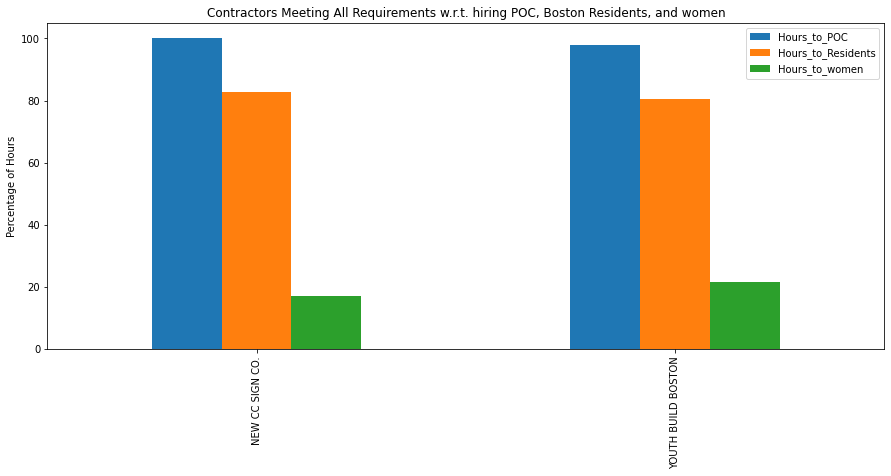

In [75]:
# start from 2017 - present
contractor_stats[all_reqs].plot(kind='bar', figsize=(15, 6), ylabel='Percentage of Hours', title='Contractors Meeting All Requirements w.r.t. hiring POC, Boston Residents, and women')

<AxesSubplot:title={'center':'Contractors Meeting Requirements w.r.t. hiring women'}, ylabel='Percentage of Hours'>

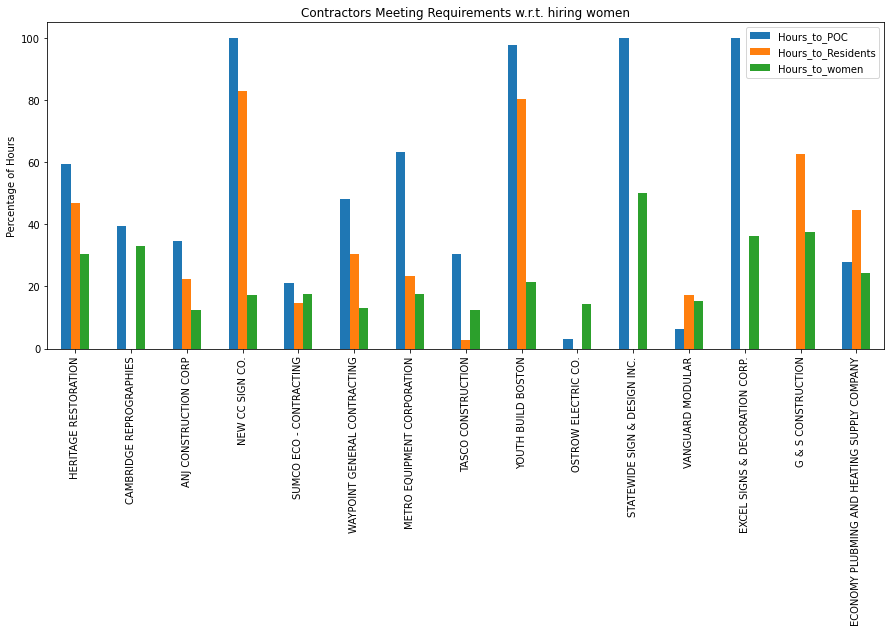

In [76]:
contractor_stats[women_reqs].plot(kind='bar', figsize=(15, 6), ylabel='Percentage of Hours', title='Contractors Meeting Requirements w.r.t. hiring women')

<AxesSubplot:title={'center':'Contractors Meeting Requirements w.r.t. hiring Boston Residents'}, ylabel='Percentage of Hours'>

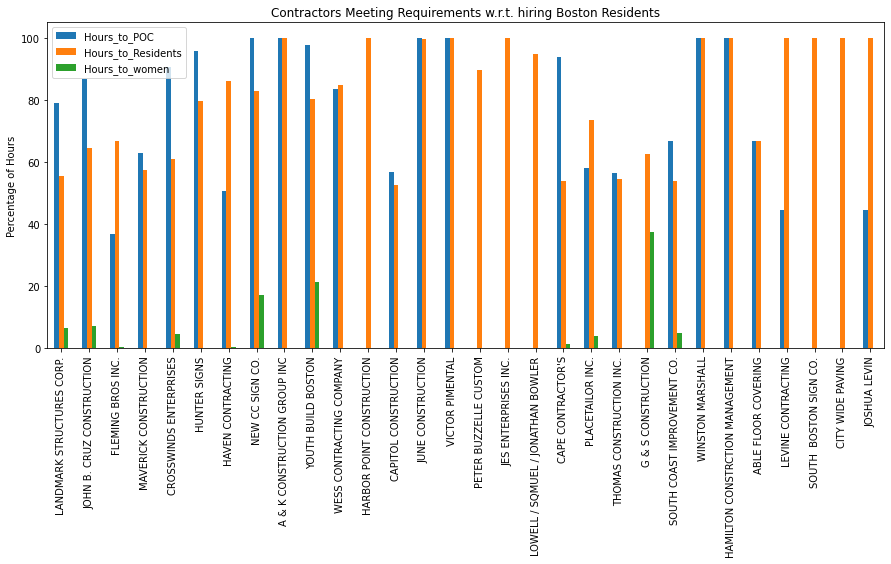

In [77]:
contractor_stats[res_reqs].plot(kind='bar', figsize=(15, 6), ylabel='Percentage of Hours', title='Contractors Meeting Requirements w.r.t. hiring Boston Residents')

<AxesSubplot:title={'center':'Contractors Meeting Requirements w.r.t. hiring POC'}, ylabel='Percentage of Hours'>

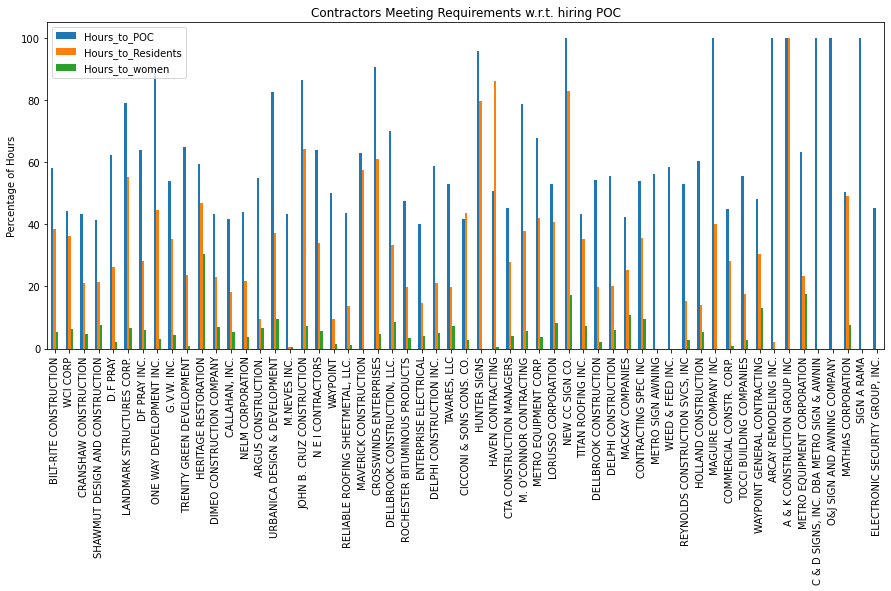

In [78]:
contractor_stats[:121][POC_reqs[:121]].plot(kind='bar', figsize=(15, 6), ylabel='Percentage of Hours', title='Contractors Meeting Requirements w.r.t. hiring POC')

<AxesSubplot:title={'center':'Contractors Meeting Requirements w.r.t. hiring POC [continued]'}, ylabel='Percentage of Hours'>

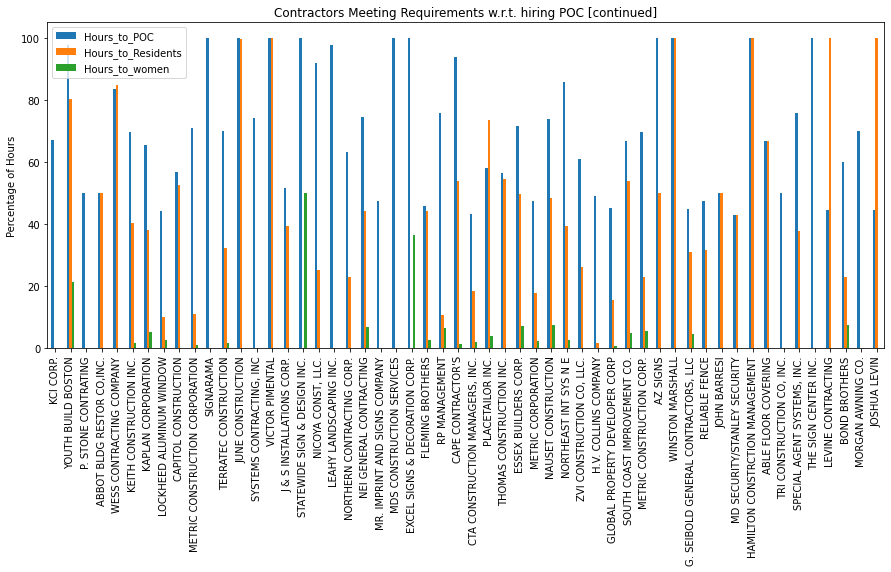

In [79]:
contractor_stats[122:][POC_reqs[122:]].plot(kind='bar', figsize=(15, 6), ylabel='Percentage of Hours', title='Contractors Meeting Requirements w.r.t. hiring POC [continued]')

<AxesSubplot:title={'center':'Contractors Meeting All Requirements w.r.t. hiring POC, and women'}, ylabel='Percentage of Hours'>

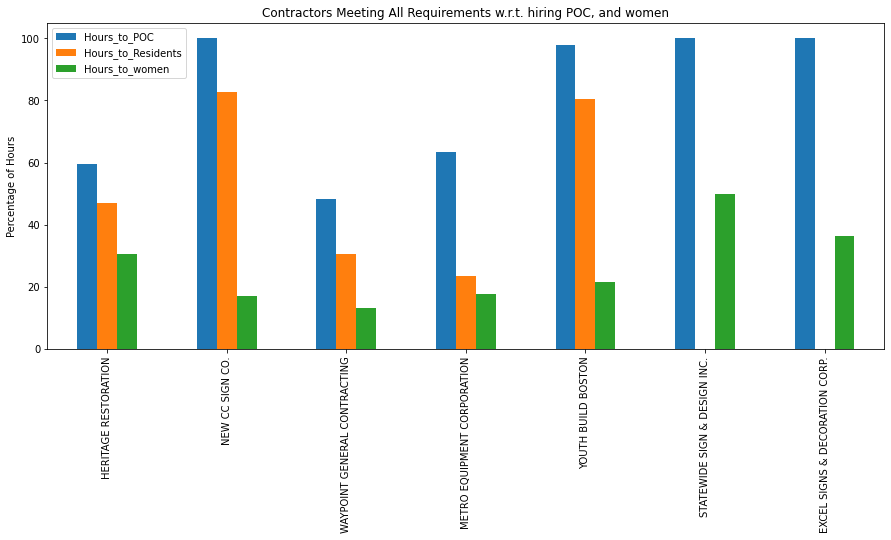

In [82]:
contractor_stats[women_and_POC_reqs].plot(kind='bar', figsize=(15, 6), ylabel='Percentage of Hours', title='Contractors Meeting All Requirements w.r.t. hiring POC, and women')

<AxesSubplot:title={'center':'Contractors Meeting All Requirements w.r.t. hiring Boston Residents, and women'}, ylabel='Percentage of Hours'>

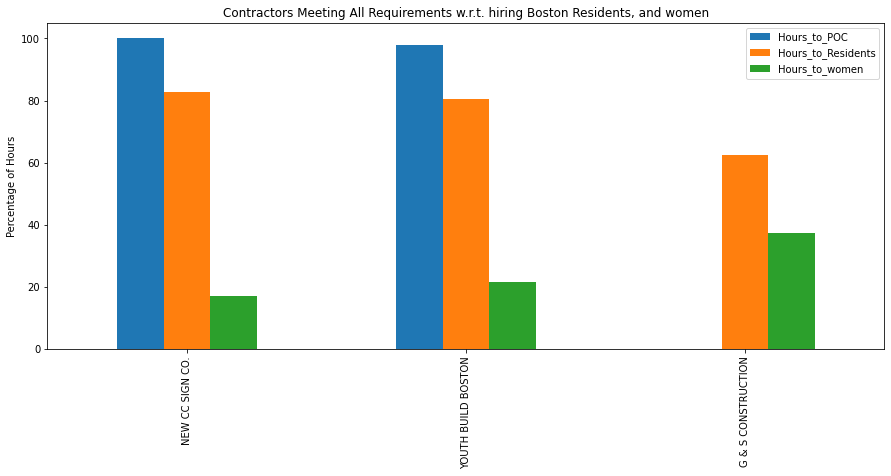

In [83]:
contractor_stats[women_and_res_reqs].plot(kind='bar', figsize=(15, 6), ylabel='Percentage of Hours', title='Contractors Meeting All Requirements w.r.t. hiring Boston Residents, and women')

<AxesSubplot:title={'center':'Contractors Meeting All Requirements w.r.t. hiring Boston Residents, and POC'}, ylabel='Percentage of Hours'>

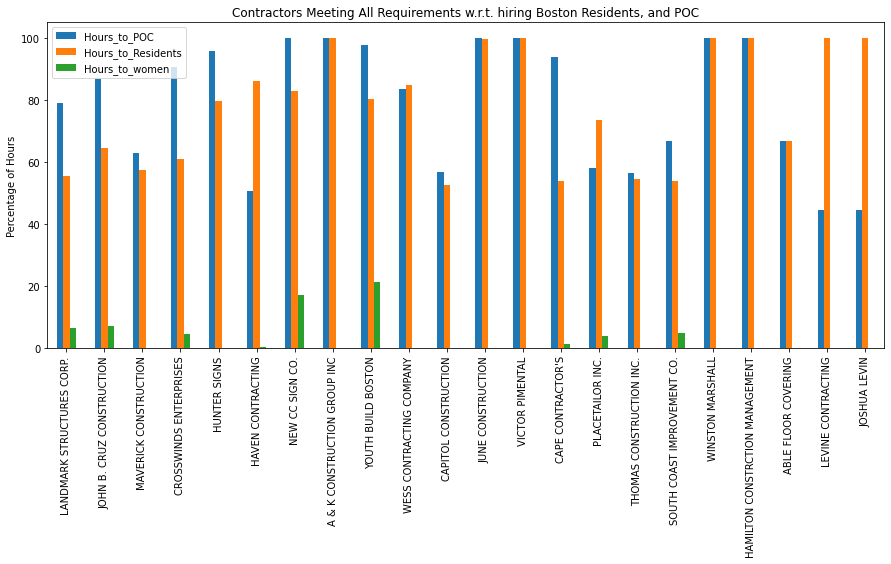

In [84]:
contractor_stats[res_and_POC_reqs].plot(kind='bar', figsize=(15, 6), ylabel='Percentage of Hours', title='Contractors Meeting All Requirements w.r.t. hiring Boston Residents, and POC')